In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("thedevastator/uncover-global-trends-in-mental-health-disorder")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'uncover-global-trends-in-mental-health-disorder' dataset.
Path to dataset files: /kaggle/input/uncover-global-trends-in-mental-health-disorder


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
data = pd.read_csv("/kaggle/input/uncover-global-trends-in-mental-health-disorder/Mental health Depression disorder Data.csv",low_memory = False,encoding="UTF-8")


In [6]:
data = data.rename(columns={"Schizophrenia (%)":"Schizophrenia","Bipolar disorder (%)":"Bipolar","Eating disorders (%)":"Eating",
                            "Anxiety disorders (%)":"Anxiety","Drug use disorders (%)":"Drug","Depression (%)":"Depression",
                            "Alcohol use disorders (%)":"Alcohol"})
print( "data columns: \n" , data.columns )

data columns: 
 Index(['index', 'Entity', 'Code', 'Year', 'Schizophrenia', 'Bipolar', 'Eating',
       'Anxiety', 'Drug', 'Depression', 'Alcohol'],
      dtype='object')


In [7]:
data.drop(["index","Code"],axis=1,inplace=True)
data.drop_duplicates(inplace=True)

In [10]:
data.dropna(subset=["Depression"],inplace=True)

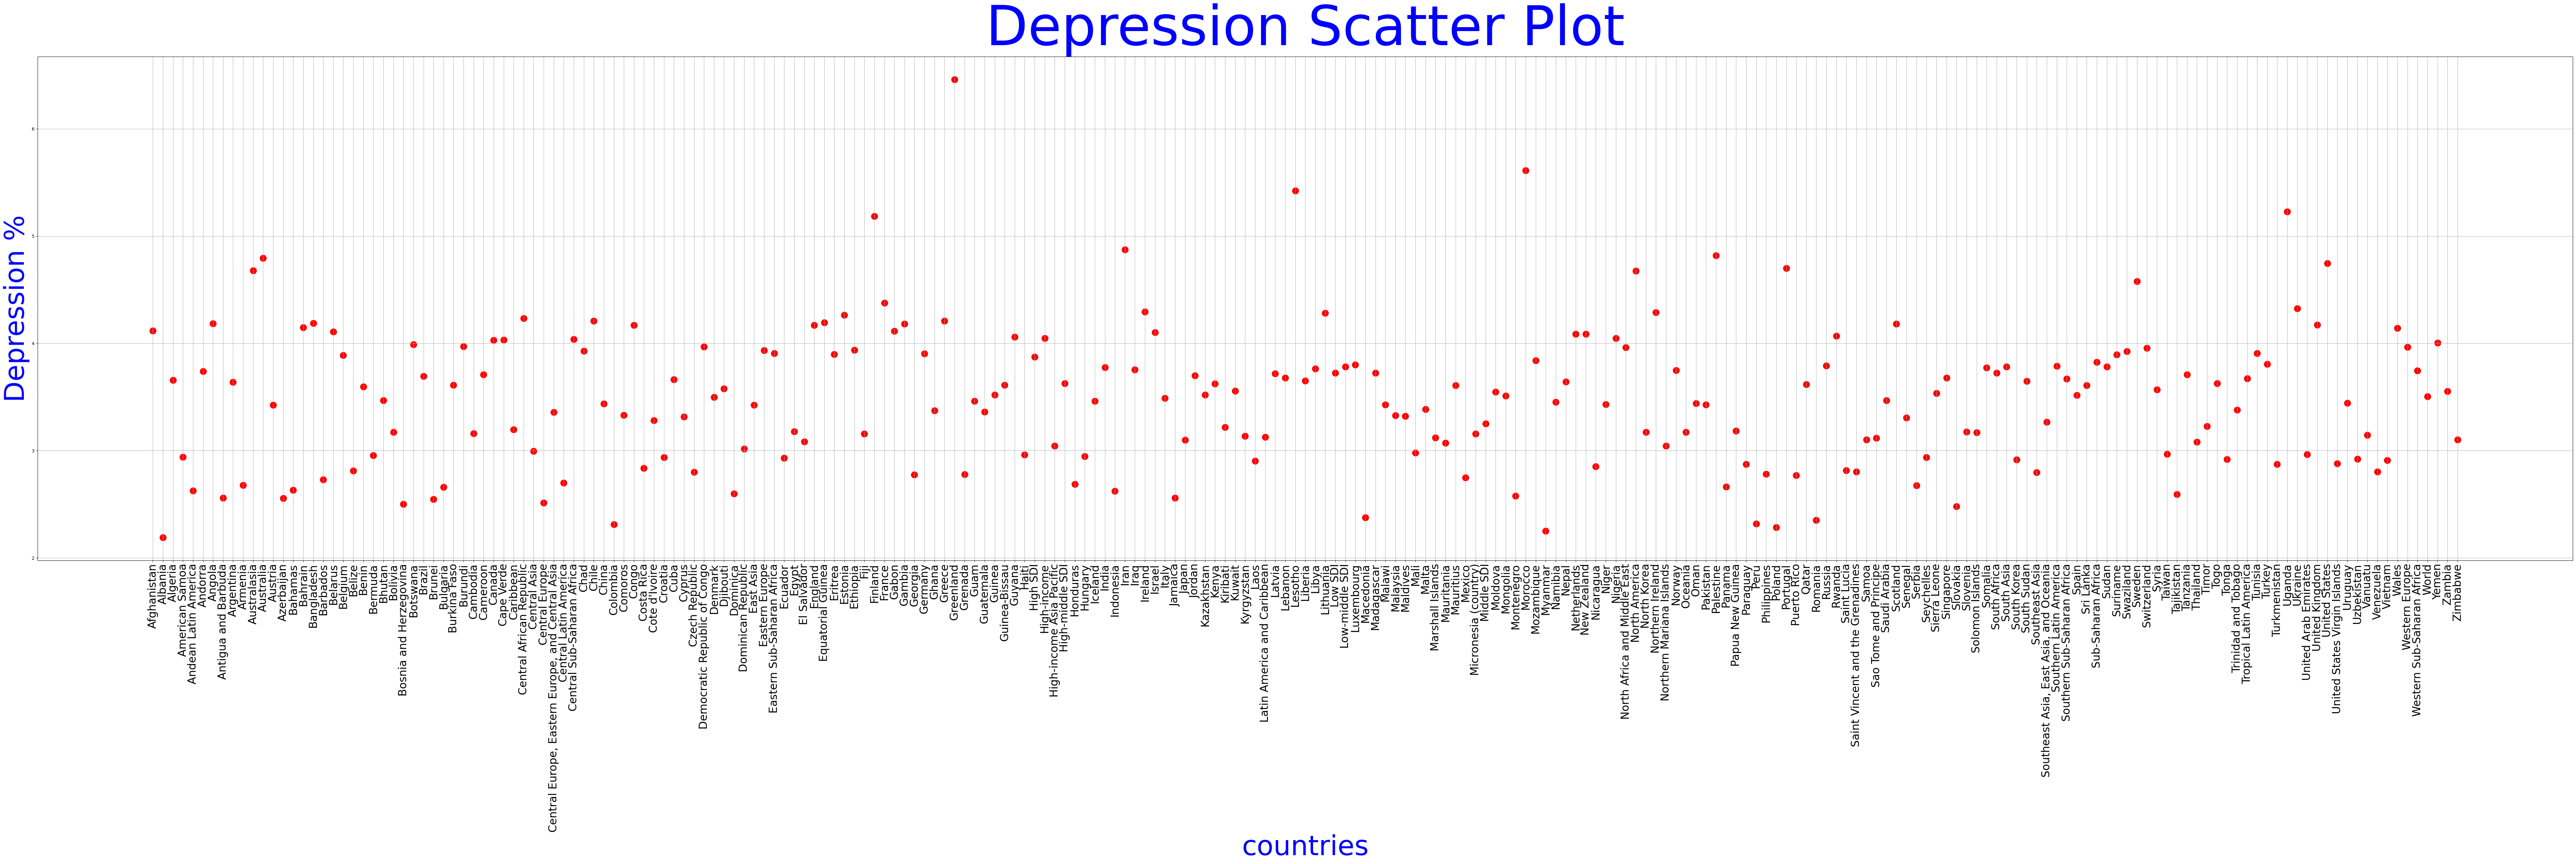

In [13]:
def scatter():
    plt.figure(figsize=(100,20),dpi=100)
    plt.scatter(avg_countries_dep.Entity , avg_countries_dep["Depression"] , c="red" , s=200)
    plt.title("Depression Scatter Plot",fontsize=120 ,color="blue")
    plt.xlabel("countries" , fontsize=60 ,color="blue")
    plt.ylabel("Depression %" , fontsize=60 ,color="blue")
    plt.xticks(rotation=90 ,fontsize=24)
    plt.grid()

avg_countries_dep = data.groupby('Entity')['Depression'].mean().reset_index()
scatter()
plt.show()

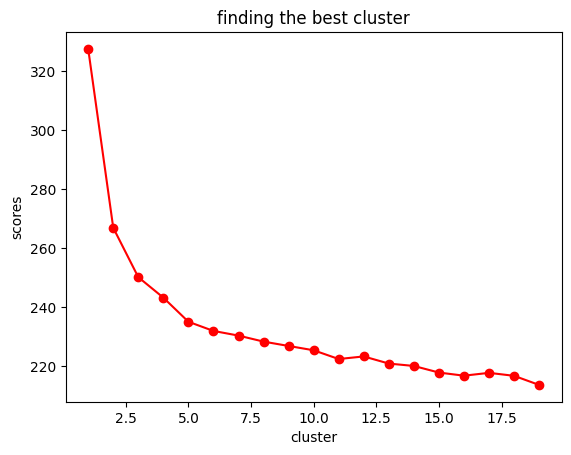

In [14]:
# Convert categorical to numeric values
dummies_data = pd.get_dummies(avg_countries_dep)

scores=[]
for i in range(1,20):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(dummies_data)
    scores.append(kmeans.inertia_)
x=np.arange(1,20)
plt.plot(x,scores,'ro-')
plt.title("finding the best cluster")
plt.xlabel("cluster")
plt.ylabel("scores")
plt.show()


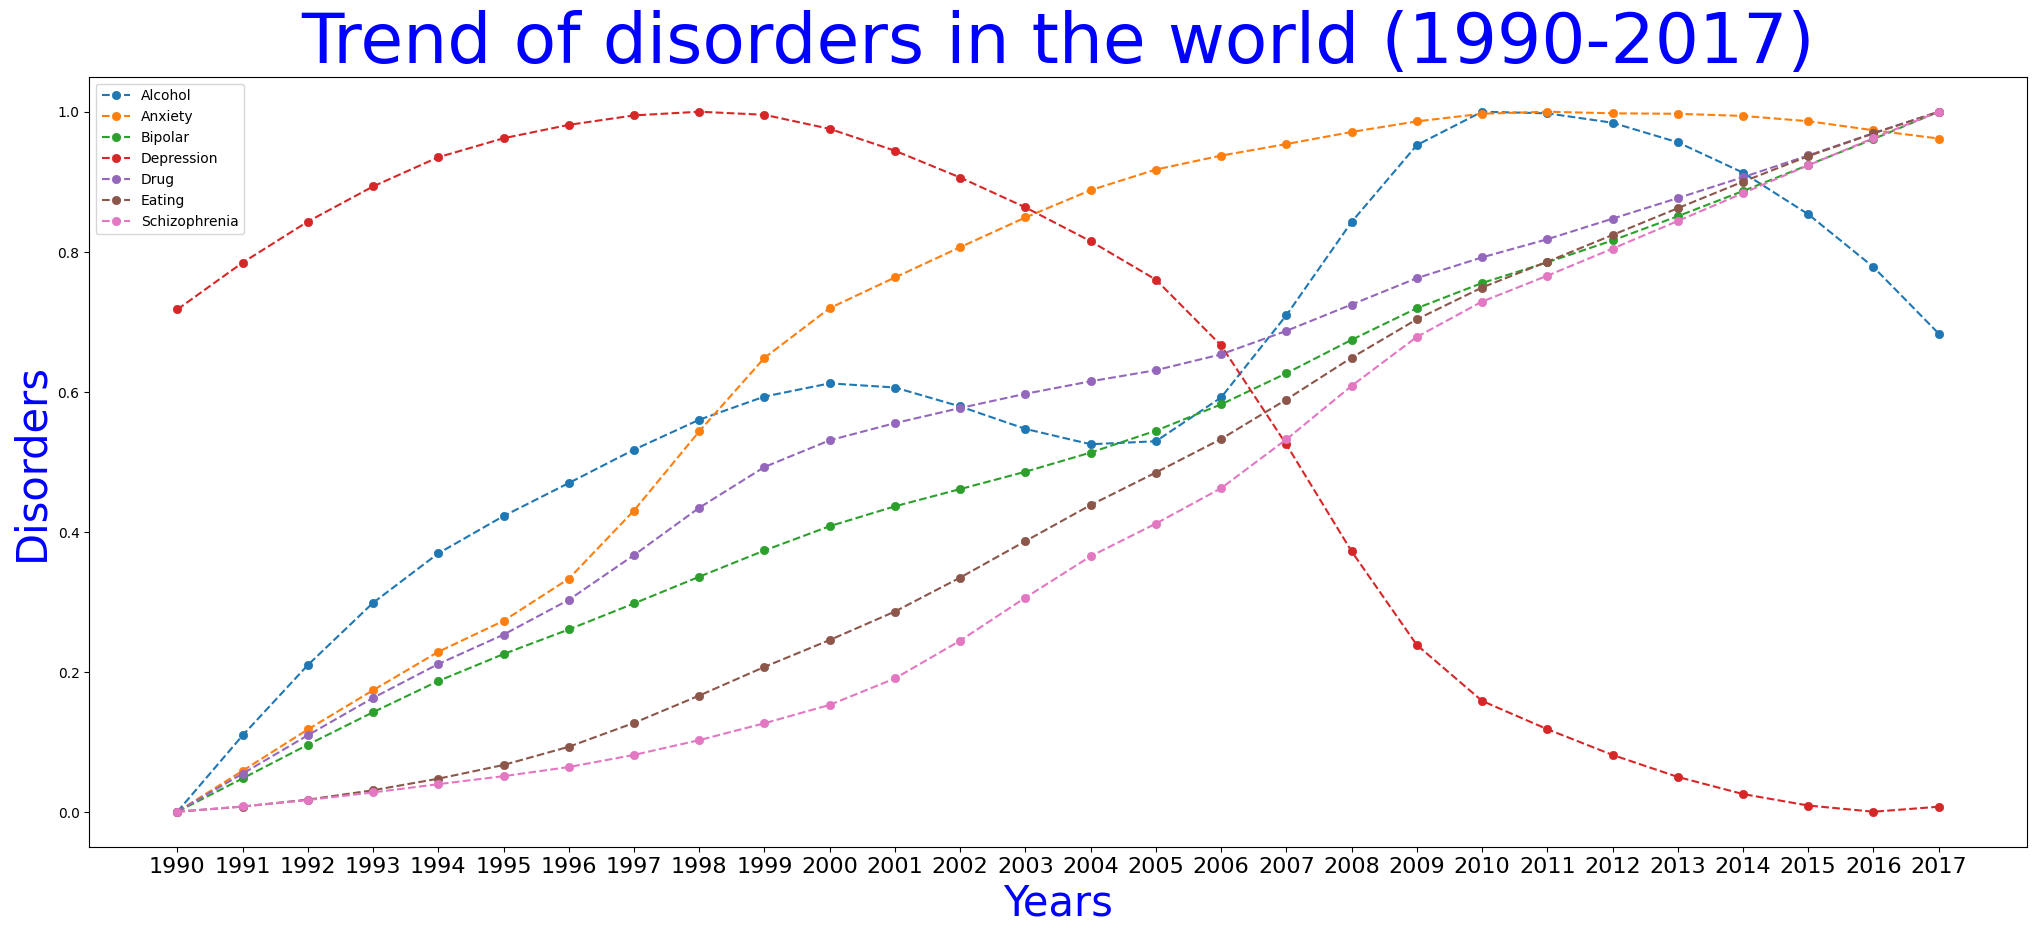

In [17]:
disorders = list ( data.columns[2:] )

# Convert disorder columns to numeric, coercing errors to NaN
for col in disorders:
    data[col] = pd.to_numeric(data[col], errors='coerce')

disorders_trends = data.pivot_table(index="Year",
                                    values=disorders,
                                    aggfunc="mean").reset_index()
scaler = MinMaxScaler()
scaled_disorders = pd.DataFrame(
    scaler.fit_transform(disorders_trends[disorders_trends.columns[1:]])
    )
scaled_disorders.columns = disorders_trends.columns[1:]

plt.figure(figsize=(25,10),dpi=100)
for column in disorders_trends.columns[1:] :
    plt.plot(disorders_trends.Year , scaled_disorders[column] ,
              label=column,
              ls="--" ,
              marker="o",
              mew=0.5)

    plt.title("Trend of disorders in the world (1990-2017)",fontsize=50 ,color="blue")
    plt.xlabel("Years" ,fontsize=30 ,color="blue")
    plt.ylabel("Disorders" ,fontsize=30 ,color="blue")
    plt.xticks(fontsize=16)
    plt.legend()
plt.show()

## Correlation Matrix



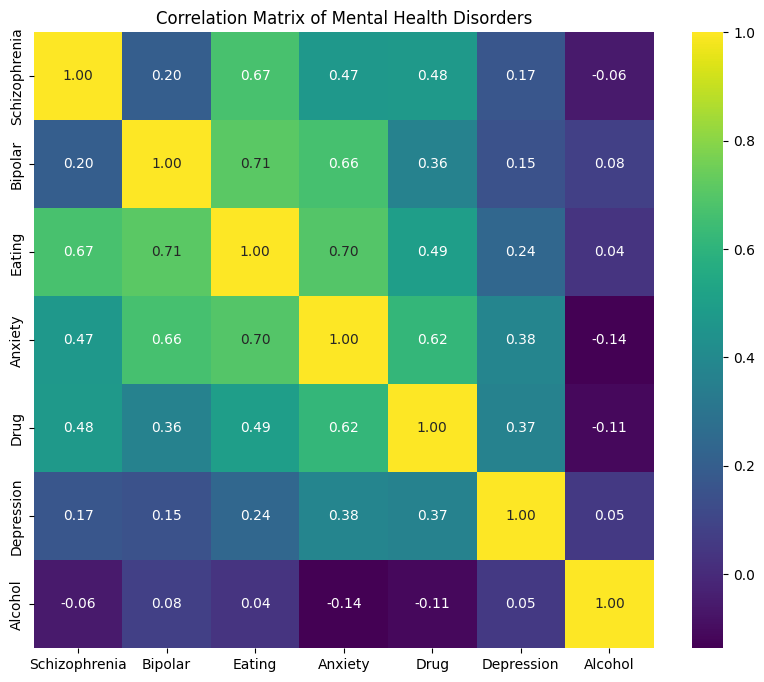

In [24]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix of Mental Health Disorders')
plt.show()

## Linear Regression Plot



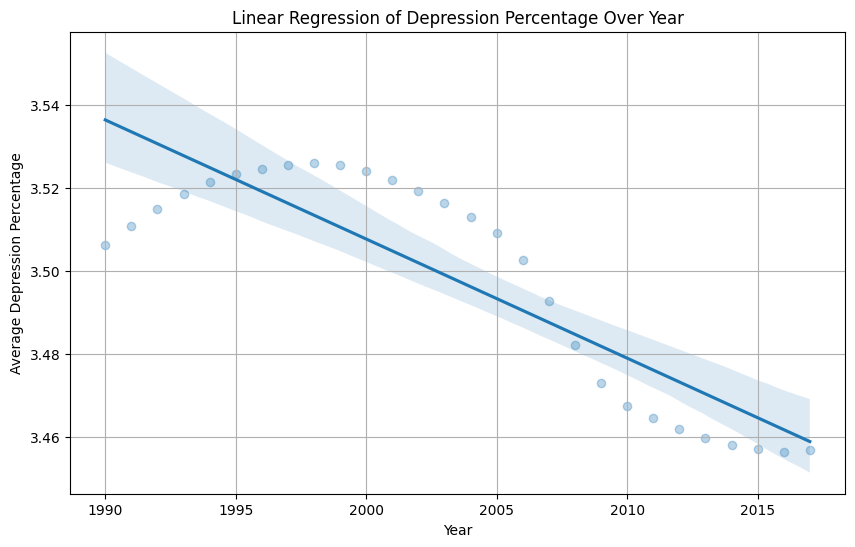

In [21]:
avg_depression_per_year = data.groupby('Year')['Depression'].mean().reset_index()

# Ensure 'Year' column is numeric
avg_depression_per_year['Year'] = pd.to_numeric(avg_depression_per_year['Year'], errors='coerce')
avg_depression_per_year.dropna(subset=['Year'], inplace=True)

plt.figure(figsize=(10, 6))
sns.regplot(x='Year', y='Depression', data=avg_depression_per_year, scatter_kws={'alpha':0.3})
plt.title('Linear Regression of Depression Percentage Over Year')
plt.xlabel('Year')
plt.ylabel('Average Depression Percentage')
plt.grid(True)
plt.show()